In [3]:
# Install GEOquery from Bioconductor
BiocManager::install("GEOquery")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: http://cran.rstudio.com/

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Installing package(s) 'GEOquery'

also installing the dependency ‘Biobase’


Old packages: 'abind', 'adehabitatHR', 'adehabitatLT', 'adehabitatMA',
  'admisc', 'AER', 'afex', 'AlgDesign', 'AlphaSimR', 'amap', 'antiword',
  'apollo', 'aqp', 'arrow', 'ars', 'arules', 'askpass', 'automap', 'BAS',
  'base64', 'bayestestR', 'bbotk', 'BDgraph', 'beepr', 'betareg', 'bigstatsr',
  'billboarder', 'BiocManager', 'bit', 'bit64', 'bitops', 'blme', 'bnlearn',
  'bonsai', 'bookdown', 'boot', 'brms', 'broom', 'broom.helpers', 'bslib',
  'car', 'caretEnsemble', 'caTools', 'cba', 'cheapr', 'checkmate', 'chk',
  'CholWishart', 'chromote', 'circular', 'cld2', 'clock', 'clusterSim',
  'collapse', 'colorspace', 'commonmark', 'compareGroups', 'copu

In [4]:
library(dplyr)
library(tidyverse)
library(GEOquery)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

In [5]:
# List files in the directory
list.files("/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086")

[1] "GSE68086_series_matrix.csv"   "GSE68086_series_matrix.txt"  
[3] "GSE68086_TEP_data_matrix.csv" "GSE68086_TEP_data_matrix.txt"

In [6]:
# Load the data from CSV file
bio_data <- read.csv("/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_TEP_data_matrix.csv")

In [7]:
# get Metadata
gmd <- getGEO(GEO = "GSE68086", GSEMatrix = TRUE)

Found 1 file(s)

GSE68086_series_matrix.txt.gz



In [8]:
# get phenodata from the metadata
metaD <- pData(phenoData(gmd[[1]]))
head(metaD)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,library_strategy,relation,relation.1,supplementary_file_1,batch:ch1,cancer type:ch1,cell type:ch1,mutational subclass:ch1,patient id:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1662534,Blood_Platelets_Breast-03,GSM1662534,Public on Oct 30 2015,Apr 21 2015,May 15 2019,SRA,1,3-Breast-Her2-ampl,Homo sapiens,tissue: blood,⋯,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN03495628,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX1001490,NONE,Batch03,Breast,Thrombocytes,HER2+,Breast-03,blood
GSM1662535,Blood_Platelets_Breast-08,GSM1662535,Public on Oct 30 2015,Apr 21 2015,May 15 2019,SRA,1,8-Breast-WT,Homo sapiens,tissue: blood,⋯,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN03495629,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX1001491,NONE,Batch03,Breast,Thrombocytes,wt,Breast-08,blood
GSM1662536,Blood_Platelets_Breast-10,GSM1662536,Public on Oct 30 2015,Apr 21 2015,May 15 2019,SRA,1,10-Breast-Her2-ampl,Homo sapiens,tissue: blood,⋯,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN03495630,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX1001492,NONE,Batch03,Breast,Thrombocytes,HER2+,Breast-10,blood
GSM1662537,Blood_Platelets_Breast-100,GSM1662537,Public on Oct 30 2015,Apr 21 2015,May 15 2019,SRA,1,Breast-100,Homo sapiens,tissue: blood,⋯,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN03495631,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX1001493,NONE,Batch04,Breast,Thrombocytes,Triple Negative,Breast-100,blood
GSM1662538,Blood_Platelets_Breast-15,GSM1662538,Public on Oct 30 2015,Apr 21 2015,May 15 2019,SRA,1,15-Breast-Her2-ampl,Homo sapiens,tissue: blood,⋯,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN03495632,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX1001494,NONE,Batch03,Breast,Thrombocytes,HER2+,Breast-15,blood
GSM1662539,Blood_Platelets_Breast-16,GSM1662539,Public on Oct 30 2015,Apr 21 2015,May 15 2019,SRA,1,16-Breast-WT,Homo sapiens,tissue: blood,⋯,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN03495633,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX1001495,NONE,Batch03,Breast,Thrombocytes,Triple Negative,Breast-16,blood


In [9]:
# select and format the structure of the metadata
metaD.modify <- metaD %>%
  select(1,8,10,46,47,48) %>%
  rename(Sample_ID = title) %>%
  rename(Sample_Description = source_name_ch1)%>%
  rename(Tissue_Type = characteristics_ch1)%>%
  rename(Cancer_Type = 'cancer type:ch1')%>%
  rename(Cell_Type = 'cell type:ch1')%>%
  rename(Mutational_Subclass = 'mutational subclass:ch1')%>%
  select(-Tissue_Type)

In [10]:
head(metaD.modify)

,Sample_ID,Sample_Description,Cancer_Type,Cell_Type,Mutational_Subclass
,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1662534,Blood_Platelets_Breast-03,3-Breast-Her2-ampl,Breast,Thrombocytes,HER2+
GSM1662535,Blood_Platelets_Breast-08,8-Breast-WT,Breast,Thrombocytes,wt
GSM1662536,Blood_Platelets_Breast-10,10-Breast-Her2-ampl,Breast,Thrombocytes,HER2+
GSM1662537,Blood_Platelets_Breast-100,Breast-100,Breast,Thrombocytes,Triple Negative
GSM1662538,Blood_Platelets_Breast-15,15-Breast-Her2-ampl,Breast,Thrombocytes,HER2+
GSM1662539,Blood_Platelets_Breast-16,16-Breast-WT,Breast,Thrombocytes,Triple Negative


In [12]:
# let's take a look at our bio_data
head(bio_data)

,X,X3.Breast.Her2.ampl,X8.Breast.WT,X10.Breast.Her2.ampl,Breast.100,X15.Breast.Her2.ampl,X16.Breast.WT,X21.Breast.WT,X33.Breast.Her2.ampl,X42.Breast.Her2.ampl,⋯,MGH.NSCLC.L20.TR500,MGH.NSCLC.L22.TR462,MGH.NSCLC.L23.TR524,MGH.NSCLC.L25.TR480,MGH.NSCLC.L39.TR519,MGH.NSCLC.L40.TR520,MGH.NSCLC.L51.TR521,MGH.NSCLC.L58.TR525,MGH.NSCLC.L59.TR522,MGH.NSCLC.L65.TR523
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003,0,0,0,0,17,0,0,0,0,⋯,0,5,10,9,0,0,0,0,0,0
2,ENSG00000000005,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,ENSG00000000419,44,14,16,8,9,0,139,108,55,⋯,2,41,40,15,1,0,13,0,0,10
4,ENSG00000000457,26,1,14,0,4,20,1,26,24,⋯,0,0,0,0,0,0,0,0,0,0
5,ENSG00000000460,81,98,18,17,0,20,144,26,97,⋯,23,1,6,22,30,0,1,50,6,2
6,ENSG00000000938,171,99,25,4,49,69,556,235,183,⋯,28,193,112,41,0,105,30,53,150,14


In [11]:
#reshaping data from wide to long
bio_data.long <- bio_data %>%
  rename(gene_ID = X)%>%
  gather(key = 'samples', value = 'FPKM', -gene_ID)

In [12]:
head(bio_data.long)

,gene_ID,samples,FPKM
,<chr>,<chr>,<int>
1,ENSG00000000003,X3.Breast.Her2.ampl,0
2,ENSG00000000005,X3.Breast.Her2.ampl,0
3,ENSG00000000419,X3.Breast.Her2.ampl,44
4,ENSG00000000457,X3.Breast.Her2.ampl,26
5,ENSG00000000460,X3.Breast.Her2.ampl,81
6,ENSG00000000938,X3.Breast.Her2.ampl,171


In [13]:
# time to combine the two data frames, that is, bio_data.long + metaD.modify

# first we need to remove the prefix X attached to the samples column of the bio_data.long dataframe

bio_data.long$samples <- gsub("^X", "", bio_data.long$samples)

In [15]:
# we replace periods with hyphens in the 'samples' column
bio_data.long$samples <- gsub("\\.", "-", bio_data.long$samples)

In [16]:
# we apply the left join now
combined <- bio_data.long%>%
  left_join(., metaD.modify, by = c('samples' = 'Sample_Description'))

head(combined)

,gene_ID,samples,FPKM,Sample_ID,Cancer_Type,Cell_Type,Mutational_Subclass
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000000003,3-Breast-Her2-ampl,0,Blood_Platelets_Breast-03,Breast,Thrombocytes,HER2+
2,ENSG00000000005,3-Breast-Her2-ampl,0,Blood_Platelets_Breast-03,Breast,Thrombocytes,HER2+
3,ENSG00000000419,3-Breast-Her2-ampl,44,Blood_Platelets_Breast-03,Breast,Thrombocytes,HER2+
4,ENSG00000000457,3-Breast-Her2-ampl,26,Blood_Platelets_Breast-03,Breast,Thrombocytes,HER2+
5,ENSG00000000460,3-Breast-Her2-ampl,81,Blood_Platelets_Breast-03,Breast,Thrombocytes,HER2+
6,ENSG00000000938,3-Breast-Her2-ampl,171,Blood_Platelets_Breast-03,Breast,Thrombocytes,HER2+


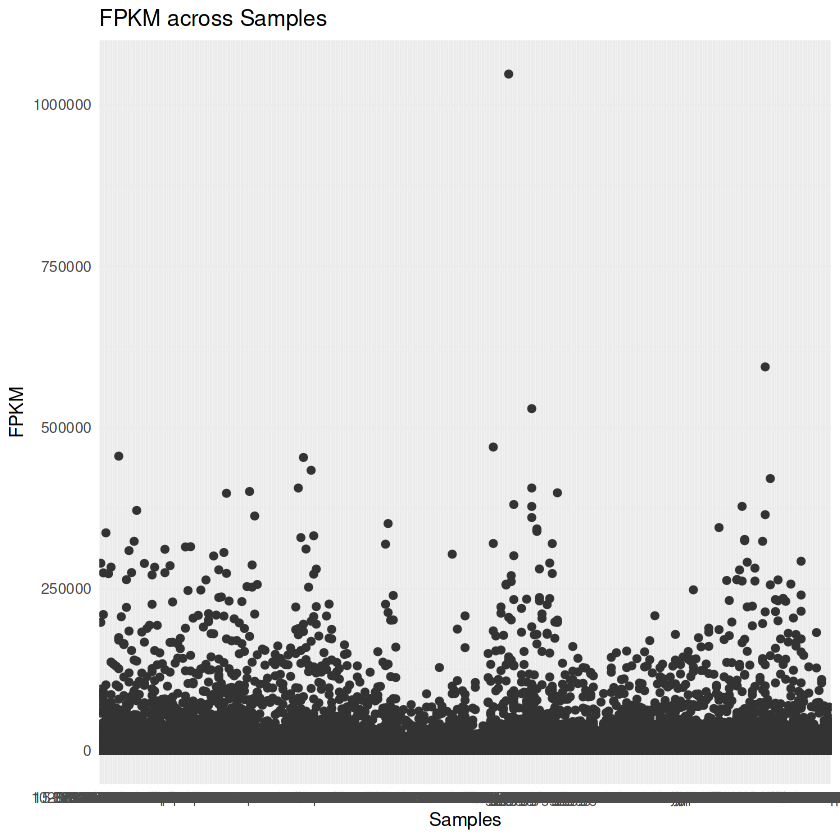

In [18]:
# Boxplot comparing FPKM across samples
ggplot(combined, aes(x = samples, y = FPKM)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "FPKM across Samples", x = "Samples", y = "FPKM")

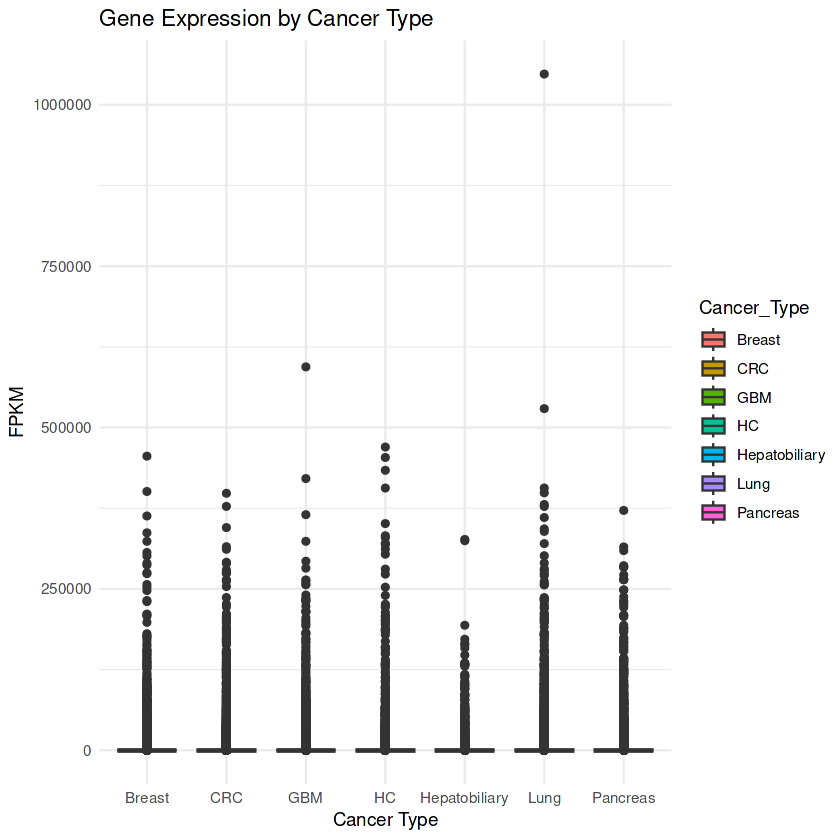

In [19]:
# Boxplot comparing FPKM between Cancer Types
ggplot(combined, aes(x = Cancer_Type, y = FPKM, fill = Cancer_Type)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Gene Expression by Cancer Type", x = "Cancer Type", y = "FPKM")

`summarise()` has grouped output by 'Mutational_Subclass'. You can override
using the `.groups` argument.


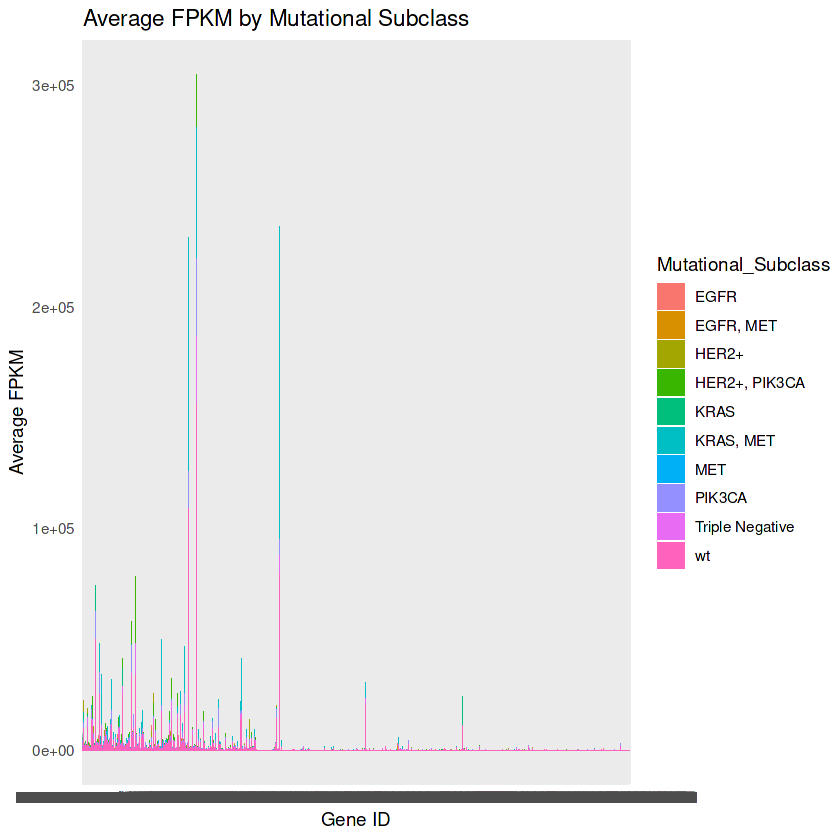

In [20]:
# Bar Plot for average FPKM by Mutational Subclass
df_avg <- combined %>%
  group_by(Mutational_Subclass, gene_ID) %>%
  summarise(avg_FPKM = mean(FPKM))

ggplot(df_avg, aes(x = gene_ID, y = avg_FPKM, fill = Mutational_Subclass)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Average FPKM by Mutational Subclass", x = "Gene ID", y = "Average FPKM")

In [21]:
# Randomly sample 5000 data points
set.seed(123)  # for reproducibility
sampled_data <- combined[sample(1:nrow(combined), 5000), ]

# Perform Shapiro-Wilk test on the sampled data
shapiro_test <- shapiro.test(sampled_data$FPKM)
shapiro_test


	Shapiro-Wilk normality test

data:  sampled_data$FPKM
W = 0.022057, p-value < 2.2e-16


The test stat (w=0.022057) and the low p value suggests non-normal distribution of the data.

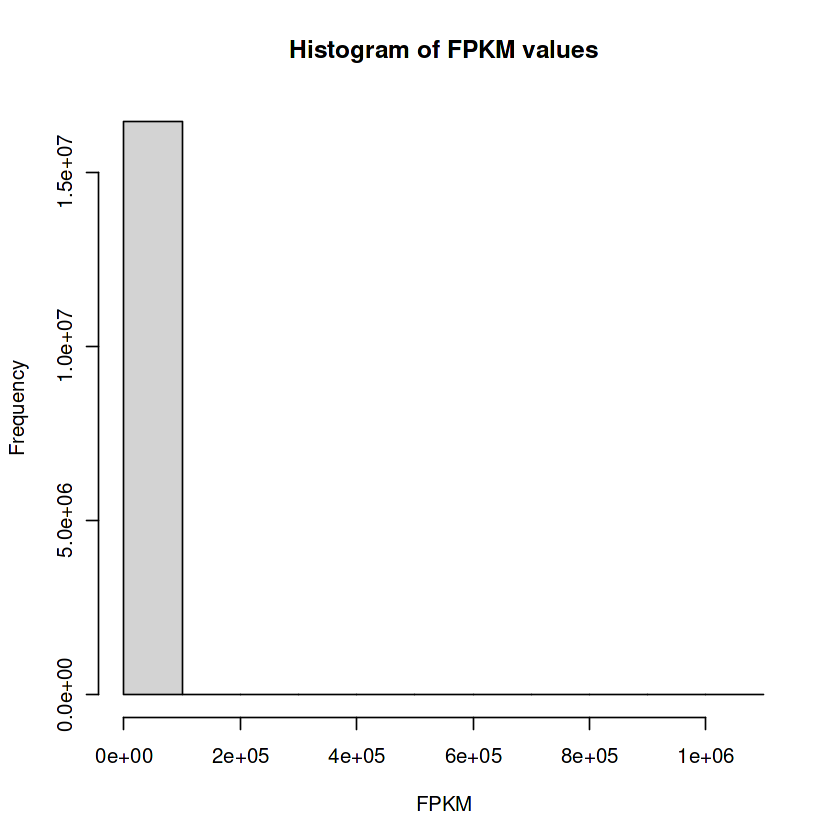

In [22]:
hist(combined$FPKM, breaks = 10, main = "Histogram of FPKM values", xlab = "FPKM")

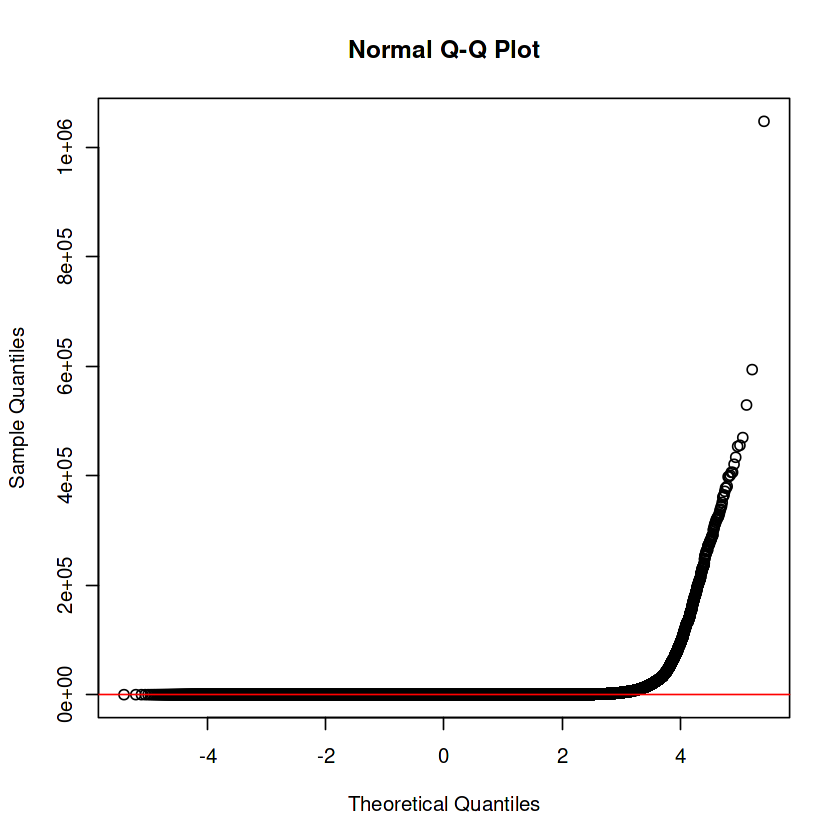

In [23]:
qqnorm(combined$FPKM)
qqline(combined$FPKM, col = "red")

To further confirm the normality, histogram and Q-Q plot were employed. The results also agree with the fact that the data is not normally distributed, as such, non parametric method (kruskal wallis) will be used to determine if there is significant difference between the FPKM and cancer types.

In [24]:
# Perform Kruskal-Wallis test
kruskal_test <- kruskal.test(FPKM ~ Cancer_Type, data = combined)

# View the results
kruskal_test


	Kruskal-Wallis rank sum test

data:  FPKM by Cancer_Type
Kruskal-Wallis chi-squared = 18870, df = 6, p-value < 2.2e-16


The result of the test stat means that at least one cancer type has a significantly distribution of FPKM values compared to the others. To evaluate this, post hoc analysis will be performed (DunnTest)

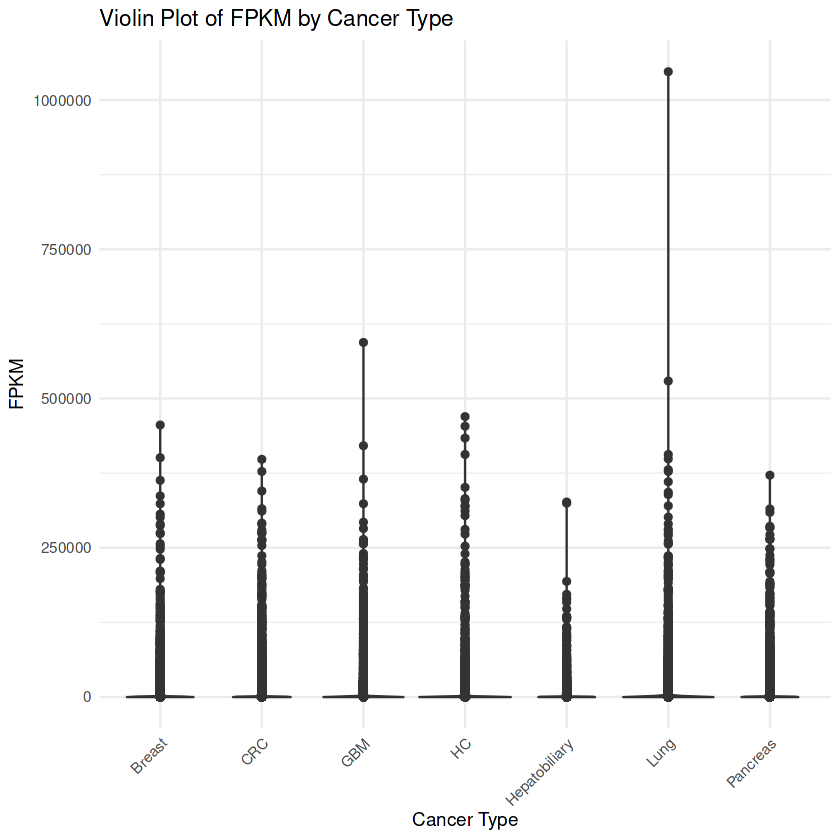

In [25]:
# Create a violin plot to show the density of the data
ggplot(combined, aes(x = Cancer_Type, y = FPKM)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1, fill = "white") +  # Add boxplot inside violin
    labs(title = "Violin Plot of FPKM by Cancer Type",
         x = "Cancer Type",
         y = "FPKM") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [26]:
library(dunn.test)

# Perform Dunn's test
dunn_test <- dunn.test(combined$FPKM, combined$Cancer_Type, method="bonferroni")
print(dunn_test)

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 18869.9206, df = 6, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |     Breast        CRC        GBM         HC   Hepatobi       Lung
---------+------------------------------------------------------------------
     CRC |   42.20255
         |    0.0000*
         |
     GBM |   14.91217  -27.28939
         |    0.0000*    0.0000*
         |
      HC |  -48.75926  -95.60904  -65.26870
         |    0.0000*    0.0000*    0.0000*
         |
Hepatobi |  -6.947791  -37.42445  -17.77745   26.86676
         |    0.0000*    0.0000*    0.0000*    0.0000*
         |
    Lung |   65.99853   20.82811   50.06442   127.3980   53.03010
         |    0.0000*    0.0000*    0.0000*    0.0000*    0.0000*
         |
Pancreas |   21.55727  -19.07415   7.187286   70.41981   22.71766  

In [27]:
# Fit a linear model
linear_model <- lm(FPKM ~ Cancer_Type, data = combined)

summary(linear_model)


Call:
lm(formula = FPKM ~ Cancer_Type, data = combined)

Residuals:
    Min      1Q  Median      3Q     Max 
    -41     -39     -38     -28 1047528 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               38.3238     0.8483  45.176  < 2e-16 ***
Cancer_TypeCRC             2.8557     1.1781   2.424   0.0154 *  
Cancer_TypeGBM            -6.2200     1.1922  -5.217 1.82e-07 ***
Cancer_TypeHC            -10.2468     1.1090  -9.239  < 2e-16 ***
Cancer_TypeHepatobiliary  -3.1886     1.6506  -1.932   0.0534 .  
Cancer_TypeLung            0.7423     1.0897   0.681   0.4958    
Cancer_TypePancreas        2.6420     1.2335   2.142   0.0322 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1273 on 16454753 degrees of freedom
Multiple R-squared:  1.477e-05,	Adjusted R-squared:  1.44e-05 
F-statistic: 40.51 on 6 and 16454753 DF,  p-value: < 2.2e-16


As can be seen above, simple linear model performs poorly as a predictor of cancer type using FPKM. Hence, machine learning models can be used to capture the relationship between cancer type and the FPKM, particularly, classification models.

In [17]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [18]:
set.seed(123)
trainIndex <- createDataPartition(combined$Cancer_Type, p = .7, 
                                  list = FALSE, 
                                  times = 1)
train_set <- combined[trainIndex, ]
test_set <- combined[-trainIndex, ]

In [19]:
library(nnet)
multinomial_model <- multinom(Cancer_Type ~ FPKM, data = train_set)

# weights:  21 (12 variable)
initial  value 22413641.080235 
iter  10 value 21712385.862439
iter  20 value 21666282.615598
final  value 21666282.127846 
converged


In [20]:
# For multinomial logistic regression
predicted_classes <- predict(multinomial_model, newdata = test_set)

In [21]:
confusion_matrix <- table(test_set$Cancer_Type, predicted_classes)
print(confusion_matrix)

               predicted_classes
                 Breast     CRC     GBM      HC Hepatobiliary    Lung Pancreas
  Breast              0       3       0       0             0  675508        0
  CRC                 0       1       0       0             0  727472        0
  GBM                 0       0       0       0             0  692832        0
  HC                  0       2       0       0             0  952642        0
  Hepatobiliary       0       0       0       0             0  242491        0
  Lung                0       2       0       0             0 1039246        0
  Pancreas            0       0       0       0             0  606228        0


In [22]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(accuracy)

[1] 0.2105262


In [26]:
precision <- diag(confusion_matrix) / rowSums(confusion_matrix)
recall <- diag(confusion_matrix) / colSums(confusion_matrix)
f1_score <- 2 * (precision * recall) / (precision + recall)

In [27]:
# Print precision, recall, and F1-score
print(paste("Precision: ", round(precision, 4)))
print(paste("Recall: ", round(recall, 4)))
print(paste("F1 Score: ", round(f1_score, 4)))

[1] "Precision:  0" "Precision:  0" "Precision:  0" "Precision:  0"
[5] "Precision:  0" "Precision:  1" "Precision:  0"
[1] "Recall:  NaN"    "Recall:  0.125"  "Recall:  NaN"    "Recall:  NaN"   
[5] "Recall:  NaN"    "Recall:  0.2105" "Recall:  NaN"   
[1] "F1 Score:  NaN"    "F1 Score:  0"      "F1 Score:  NaN"   
[4] "F1 Score:  NaN"    "F1 Score:  NaN"    "F1 Score:  0.3478"
[7] "F1 Score:  NaN"   


In [30]:
# Visualizing the confusion matrix using a heatmap
library(ggplot2)
library(reshape2)

# Melt the confusion matrix
conf_matrix_melted <- as.data.frame(as.table(confusion_matrix))

In [31]:
colnames(conf_matrix_melted) <- c("Actual", "Predicted", "Count")

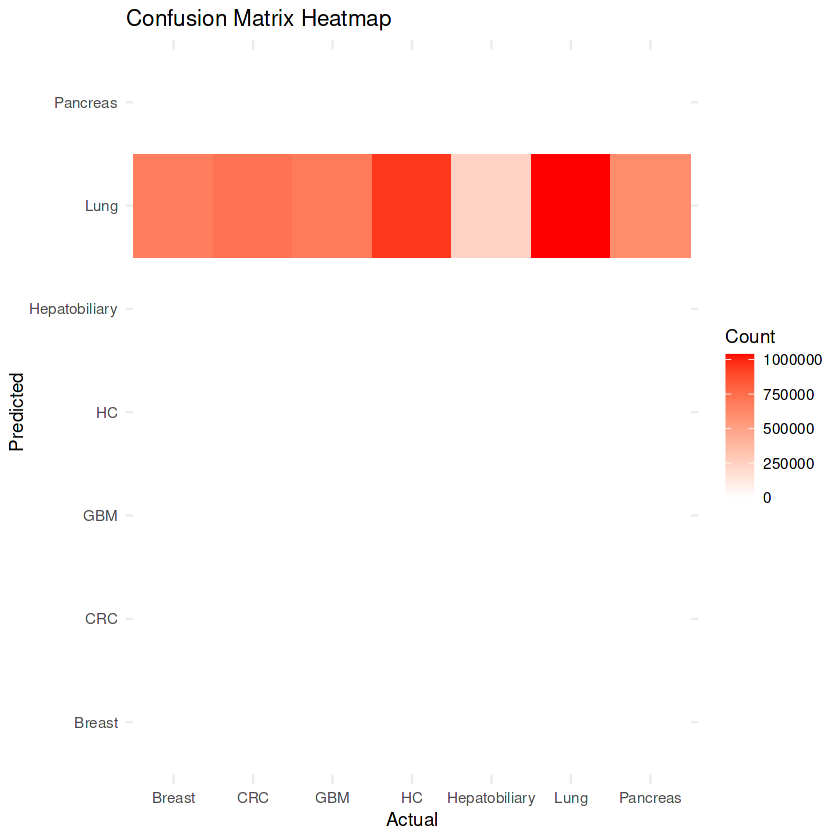

In [32]:
# Visualize the confusion matrix with a heatmap
ggplot(conf_matrix_melted, aes(x = Actual, y = Predicted, fill = Count)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(x = "Actual", y = "Predicted", fill = "Count") +
  ggtitle("Confusion Matrix Heatmap") +
  theme_minimal()

Logistic regression model performed poorly as seen by the metrics evaluated. Since logistic regression captures linear patterns in the data and the data could as well be non-linear, models like random forest or SVM or Xgboost should be used. 

In [34]:
library(xgboost)

In [35]:
train_set$Cancer_Type <- as.numeric(as.factor(train_set$Cancer_Type)) - 1

In [36]:
numeric_features <- train_set[, sapply(train_set, is.numeric)]
feature_matrix <- as.matrix(numeric_features)


In [37]:
# Create an xgb.DMatrix
dtrain <- xgb.DMatrix(data = feature_matrix, label = train_set$Cancer_Type)

In [38]:
# Define parameters for XGBoost
param <- list(max_depth = 6, eta = 0.1, objective = "multi:softmax", num_class = length(unique(train_set$Cancer_Type)))

In [39]:
# Train the XGBoost model
xgb_model <- xgboost(params = param, data = dtrain, nrounds = 100)

[1]	train-mlogloss:1.607145 
[2]	train-mlogloss:1.369617 
[3]	train-mlogloss:1.186696 
[4]	train-mlogloss:1.038886 
[5]	train-mlogloss:0.915908 
[6]	train-mlogloss:0.811585 
[7]	train-mlogloss:0.721869 
[8]	train-mlogloss:0.643942 
[9]	train-mlogloss:0.575741 
[10]	train-mlogloss:0.515706 
[11]	train-mlogloss:0.462616 
[12]	train-mlogloss:0.415497 
[13]	train-mlogloss:0.373554 
[14]	train-mlogloss:0.336129 
[15]	train-mlogloss:0.302669 
[16]	train-mlogloss:0.272705 
[17]	train-mlogloss:0.245835 
[18]	train-mlogloss:0.221710 
[19]	train-mlogloss:0.200030 
[20]	train-mlogloss:0.180530 
[21]	train-mlogloss:0.162978 
[22]	train-mlogloss:0.147170 
[23]	train-mlogloss:0.132925 
[24]	train-mlogloss:0.120082 
[25]	train-mlogloss:0.108499 
[26]	train-mlogloss:0.098047 
[27]	train-mlogloss:0.088615 
[28]	train-mlogloss:0.080099 
[29]	train-mlogloss:0.072410 
[30]	train-mlogloss:0.065465 
[31]	train-mlogloss:0.059191 
[32]	train-mlogloss:0.053522 
[33]	train-mlogloss:0.048400 
[34]	train-mlogloss

The Xgboost trained too well, as seen in the rapid decrement of the log loss and even that could be worrisome as it holds a massive potential for overfitting the data. 

In [40]:
# Prepare test set
test_set$Cancer_Type <- as.numeric(as.factor(test_set$Cancer_Type)) - 1
test_features <- as.matrix(test_set[, sapply(test_set, is.numeric)])

In [41]:
# Make predictions on test data
preds <- predict(xgb_model, test_features)

In [42]:
# Convert predictions to classes
predicted_classes <- as.factor(round(preds))

In [43]:
confusion_matrix <- confusionMatrix(predicted_classes, as.factor(test_set$Cancer_Type))
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction       0       1       2       3       4       5       6
         0  675511       0       0       0       0       0       0
         1       0  727473       0       0       0       0       0
         2       0       0  692832       0       0       0       0
         3       0       0       0  952644       0       0       0
         4       0       0       0       0  242491       0       0
         5       0       0       0       0       0 1039248       0
         6       0       0       0       0       0       0  606228

Overall Statistics
                                   
               Accuracy : 1        
                 95% CI : (1, 1)   
    No Information Rate : 0.2105   
    P-Value [Acc > NIR] : < 2.2e-16
                                   
                  Kappa : 1        
                                   
 Mcnemar's Test P-Value : NA       

Statistics by Class:

                     Class: 0 Class: 1 Class

As explained earlier, the Xgboost model performed too well with 100% in some metrics. It could be the effects of the overfitting, hence cross validation will be employed to re-evaluate the model.

In [47]:
train_set <- train_set[, c("FPKM", "Cancer_Type")]

In [48]:
train_set$Cancer_Type <- as.factor(train_set$Cancer_Type)

In [50]:
# Prepare the data for xgboost
dtrain <- xgb.DMatrix(data = as.matrix(train_set[, "FPKM", drop = FALSE]), label = as.numeric(train_set$Cancer_Type) - 1)

In [51]:
# Set parameters for the XGBoost model
params <- list(
  objective = "multi:softmax",  # Multiclass classification
  num_class = length(levels(train_set$Cancer_Type)),  # Number of classes
  eta = 0.1,                     # Learning rate
  max_depth = 6,                 # Maximum depth of trees
  eval_metric = "mlogloss"       # Evaluation metric
)

# Train the model with cross-validation
set.seed(123)  # For reproducibility
cv_model <- xgb.cv(
  params = params,
  data = dtrain,
  nrounds = 100,               # Number of boosting rounds
  nfold = 5,                   # Number of folds for cross-validation
  early_stopping_rounds = 10,  # Stop if no improvement
  verbose = 1
)


[1]	train-mlogloss:1.939248+0.000003	test-mlogloss:1.939250+0.000004 
Multiple eval metrics are present. Will use test_mlogloss for early stopping.
Will train until test_mlogloss hasn't improved in 10 rounds.

[2]	train-mlogloss:1.933294+0.000005	test-mlogloss:1.933298+0.000008 
[3]	train-mlogloss:1.927966+0.000008	test-mlogloss:1.927971+0.000012 
[4]	train-mlogloss:1.923190+0.000010	test-mlogloss:1.923197+0.000016 
[5]	train-mlogloss:1.918905+0.000011	test-mlogloss:1.918913+0.000020 
[6]	train-mlogloss:1.915055+0.000013	test-mlogloss:1.915065+0.000024 
[7]	train-mlogloss:1.911593+0.000015	test-mlogloss:1.911605+0.000027 
[8]	train-mlogloss:1.908478+0.000016	test-mlogloss:1.908492+0.000031 
[9]	train-mlogloss:1.905674+0.000017	test-mlogloss:1.905688+0.000034 
[10]	train-mlogloss:1.903146+0.000018	test-mlogloss:1.903162+0.000037 
[11]	train-mlogloss:1.900868+0.000019	test-mlogloss:1.900885+0.000041 
[12]	train-mlogloss:1.898814+0.000020	test-mlogloss:1.898832+0.000044 
[13]	train-mloglo

In [52]:
# Train final model on the full dataset
final_model <- xgboost(
  params = params,
  data = dtrain,
  nrounds = cv_model$best_iteration  # Use the best iteration found during CV
)

[1]	train-mlogloss:1.939248 
[2]	train-mlogloss:1.933295 
[3]	train-mlogloss:1.927967 
[4]	train-mlogloss:1.923191 
[5]	train-mlogloss:1.918906 
[6]	train-mlogloss:1.915056 
[7]	train-mlogloss:1.911595 
[8]	train-mlogloss:1.908480 
[9]	train-mlogloss:1.905676 
[10]	train-mlogloss:1.903148 
[11]	train-mlogloss:1.900871 
[12]	train-mlogloss:1.898816 
[13]	train-mlogloss:1.896963 
[14]	train-mlogloss:1.895290 
[15]	train-mlogloss:1.893781 
[16]	train-mlogloss:1.892418 
[17]	train-mlogloss:1.891187 
[18]	train-mlogloss:1.890075 
[19]	train-mlogloss:1.889072 
[20]	train-mlogloss:1.888165 
[21]	train-mlogloss:1.887347 
[22]	train-mlogloss:1.886608 
[23]	train-mlogloss:1.885940 
[24]	train-mlogloss:1.885337 
[25]	train-mlogloss:1.884793 
[26]	train-mlogloss:1.884302 
[27]	train-mlogloss:1.883858 
[28]	train-mlogloss:1.883458 
[29]	train-mlogloss:1.883097 
[30]	train-mlogloss:1.882771 
[31]	train-mlogloss:1.882477 
[32]	train-mlogloss:1.882212 
[33]	train-mlogloss:1.881973 
[34]	train-mlogloss

In [54]:
# Extract the trees from the model and print them
trees <- xgb.model.dt.tree(model = final_model)
print(trees)

        Tree  Node     ID Feature Split    Yes     No Missing       Quality
       <int> <int> <char>  <char> <num> <char> <char>  <char>         <num>
    1:     0     0    0-0    FPKM     2    0-1    0-2     0-2  2.309070e+02
    2:     0     1    0-1    FPKM     1    0-3    0-4     0-4  1.937659e+01
    3:     0     2    0-2    FPKM   218    0-5    0-6     0-6  1.284146e+01
    4:     0     3    0-3    Leaf    NA   <NA>   <NA>    <NA> -2.764291e-03
    5:     0     4    0-4    Leaf    NA   <NA>   <NA>    <NA> -4.726447e-03
   ---                                                                     
29229:   678    26 678-26    Leaf    NA   <NA>   <NA>    <NA>  1.862061e-03
29230:   678    27 678-27    Leaf    NA   <NA>   <NA>    <NA> -1.448933e-03
29231:   678    28 678-28    Leaf    NA   <NA>   <NA>    <NA> -8.088305e-03
29232:   678    29 678-29    Leaf    NA   <NA>   <NA>    <NA>  1.654856e-03
29233:   678    30 678-30    Leaf    NA   <NA>   <NA>    <NA> -3.764416e-05
            

In [55]:
test_X <- as.matrix(test_set[, "FPKM"])
test_y <- as.numeric(test_set$Cancer_Type) - 1

In [56]:
test_preds <- predict(final_model, newdata = xgb.DMatrix(test_X))

In [57]:
test_preds_factor <- as.factor(test_preds)
test_y_factor <- as.factor(test_y)

In [58]:
# Confusion matrix
confusion_matrix <- table(Predicted = test_preds_factor, Actual = test_y_factor)
print(confusion_matrix)

         Actual
Predicted     -1      0      1      2      3      4      5
        3  76713  73796  78209 127932  29039  97214  63819
        5 598798 653677 614623 824712 213452 942034 542409


In [59]:
# Detailed confusion matrix and statistics
conf_matrix_stats <- confusionMatrix(test_preds_factor, test_y_factor)
print(conf_matrix_stats)

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(test_preds_factor, test_y_factor):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction     -1      0      1      2      3      4      5
        -1      0      0      0      0      0      0      0
        0       0      0      0      0      0      0      0
        1       0      0      0      0      0      0      0
        2       0      0      0      0      0      0      0
        3   76713  73796  78209 127932  29039  97214  63819
        4       0      0      0      0      0      0      0
        5  598798 653677 614623 824712 213452 942034 542409

Overall Statistics
                                         
               Accuracy : 0.1158         
                 95% CI : (0.1155, 0.116)
    No Information Rate : 0.2105         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0013         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: -1 Class: 0 Class:

After cross val., the balanced accuracy reduced as compared to before and other metrics as well reduced. 
However, the structure of the data and the use of one feature (FPKM) to predict the cancer type makes it challenging to rely on the model's output.